In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import  re

In [2]:
df = pd.read_csv(r'C:\Users\aayus\final.csv')
df.head()

,Unnamed: 0,Job_Title,Company_Website,Seniority Level,Employment Type,Job Function,Industry Type,Selected Role Daily Task
0,0,Data Scientist,https://www.linkedin.com/company/fusemachines,Mid-Senior level,Contract,Engineering and Information Technology,Internet Publishing,Fusemachines seeks a Data Scientist for a remo...
1,1,Data Scientist,https://in.linkedin.com/company/acmeservices,Mid-Senior level,Full-time,Engineering and Information Technology,Retail,Job Description:\n- Improve algorithms for job...
2,2,Data Scientist - Kochi,https://in.linkedin.com/company/ripplesindia-g...,Entry level,Full-time,Engineering and Information Technology,"Airlines and Aviation, Aviation and Aerospace ...",Seeking experienced Data Scientist for predict...
3,3,Software Engineer - AI/ML,https://in.linkedin.com/company/mindfire-solut...,Entry level,Full-time,Engineering and Information Technology,Software Development,"AI/ML Engineer designs, validates, and integra..."
4,4,Data Science,https://in.linkedin.com/company/acmeservices,Entry level,Full-time,Other,Human Resources Services,Seeking skilled Data Scientists for independen...


In [3]:
df['Seniority Level'].unique()

array(['Mid-Senior level', 'Entry level', 'Associate', 'Not Applicable',
       'Executive', 'Internship', 'Director'], dtype=object)

In [4]:
df['Job Function'].unique()

array(['Engineering and Information Technology', 'Other',
       'Information Technology', 'Information Technology and Engineering',
       'Engineering', 'Engineering and Other',
       'Information Technology, Analyst, and Engineering',
       'Information Technology, Science, and Other', 'Analyst and Other',
       'Research', 'Analyst, Consulting, and Engineering',
       'Research, Analyst, and Information Technology',
       'Business Development, Information Technology, and Engineering',
       'Health Care Provider', 'Information Technology and Analyst',
       'Production', 'Analyst',
       'Project Management, Other, and Information Technology',
       'Management, Information Technology, and Engineering',
       'Information Technology, Engineering, and Consulting',
       'Engineering, Information Technology, and Research',
       'Business Development and Sales'], dtype=object)

In [5]:
for value in df['Job Function'].unique():
    if(value != 'Engineering and Information Technology'):
        df['Job Function'] = df['Job Function'].replace(value, 'Others')
        

In [6]:
 df['Job Function'].unique()

array(['Engineering and Information Technology', 'Others'], dtype=object)

In [7]:
df.Job_Title.unique()

array(['Data Scientist', 'Data Scientist - Kochi',
       'Software Engineer - AI/ML', 'Data Science', 'ML Engineer',
       'Machine Learning Engineer(ML)',
       'AI ML Developer-Python Programming', 'Junior ML Engineer',
       'Python Developer / Fresher Batch(2023-24 Batch)-',
       'Data Scientist - Deputy Manager',
       'Senior Machine Learning Engineer, Recommendations',
       'Lead Data Scientist', 'AI and Machine Learning Engineer',
       'Jr Data Scientist', 'Senior Data Scientist',
       'Data Scientist - Business Intelligence',
       'Sr. Data Scientist – IoT data & Satellite Analytics',
       'Assistant Data Scientist', 'Machine Learning Engineer',
       'Machine learning developer', 'Machine Learning',
       'MACHINE LEARNING AI PLATFORM ENGINEER',
       'Machine Learning Expert - BLR HYD GGN', 'Data Scientist - Python',
       'AI ENGINEER', 'Decision Scientist ( Data Analytics )',
       'Data Scientist (Remote)', 'AI Researcher',
       'Junior data Scient

In [8]:
for value in df.Job_Title.items():
    
    if  ((re.search(r'(Data Scientist|Data Science Engineer)',str(value)))):
        df['Job_Title'].replace(value, 'Data Scientist',inplace = True)
        
    elif ((re.search(r'(Machine Learning| ML)',str(value)))):
        df['Job_Title'].replace(value, 'Machine Learning', inplace = True)
        
    else:
        df['Job_Title'].replace(value, 'Others', inplace = True)    

In [9]:
df['Job_Title'].unique()

array(['Data Scientist', 'Others', 'Machine Learning'], dtype=object)

Text(0.5, 1.0, 'Job Distribution Within Data')

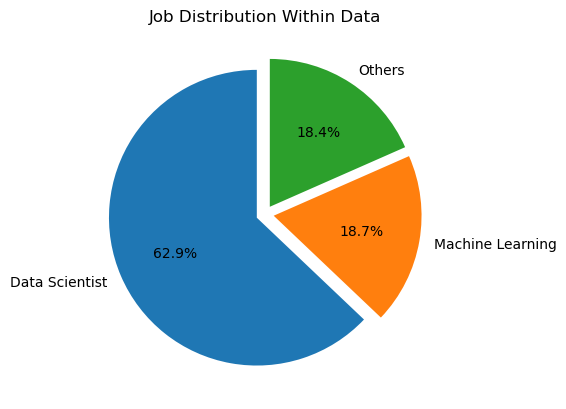

In [10]:
plt.pie(df['Job_Title'].value_counts(), labels = df['Job_Title'].value_counts().index, autopct = '%1.1f%%',startangle = 90, explode = [0.06,0.06,0.06])
plt.title('Job Distribution Within Data')

In [11]:
df['Seniority Level'].unique()

array(['Mid-Senior level', 'Entry level', 'Associate', 'Not Applicable',
       'Executive', 'Internship', 'Director'], dtype=object)

Text(0.5, 1.0, 'Type/Level of Job')

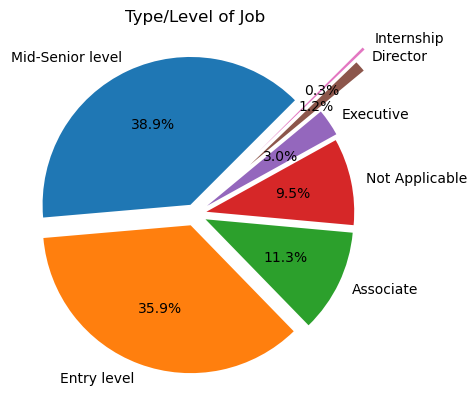

In [12]:
plt.pie(df['Seniority Level'].value_counts(), labels = df['Seniority Level'].value_counts().index, autopct = '%1.1f%%', explode = [0.07,0.08,0.08,0.08,0.1,0.5,0.6], startangle = 45)
plt.title("Type/Level of Job")

Text(0.5, 1.0, 'Job with respect to Seniority Level')

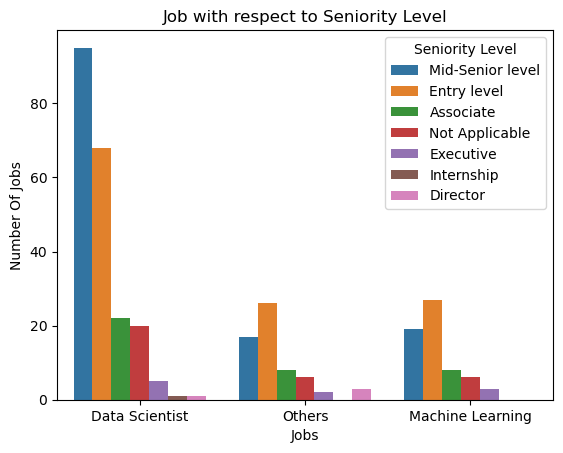

In [13]:
sn.countplot(x = 'Job_Title', hue = 'Seniority Level', data = df)
plt.xlabel('Jobs')
plt.ylabel('Number Of Jobs')
plt.title('Job with respect to Seniority Level')

In [14]:
df['Industry Type'].unique()

array(['Internet Publishing', 'Retail',
       'Airlines and Aviation, Aviation and Aerospace Component Manufacturing, and Banking',
       'Software Development', 'Human Resources Services',
       'Information Technology & Services', 'Biotechnology Research',
       'Business Consulting and Services',
       'IT Services and IT Consulting',
       'Information Services and Engineering Services',
       'Technology, Information and Internet', 'Staffing and Recruiting',
       'Software Development and IT Services and IT Consulting',
       'Advertising Services', 'Information Services',
       'Software Development, IT Services and IT Consulting, and Technology, Information and Internet',
       'Community Services',
       'Business Consulting and Services, Computer Networking Products, and Software Development',
       'Data Infrastructure and Analytics, Technology, Information and Internet, and Software Development',
       'IT Services and IT Consulting, Advertising Services, and 

In [15]:
for index, value in df['Industry Type'].items():
    if re.search(r'(Technology|Information|IT|Software Development)', str(value)):
        df.at[index, 'Industry Type'] = 'Technology'
    elif re.search(r'(Financial|Insurance|Banking|Business|Marketing)', str(value)):
        df.at[index, 'Industry Type'] = 'Finance & Business'
    else:
        df.at[index, 'Industry Type'] = 'Others'
        

In [16]:
df['Industry Type'].unique()

array(['Others', 'Finance & Business', 'Technology'], dtype=object)

Text(0.5, 1.0, 'Industry Type')

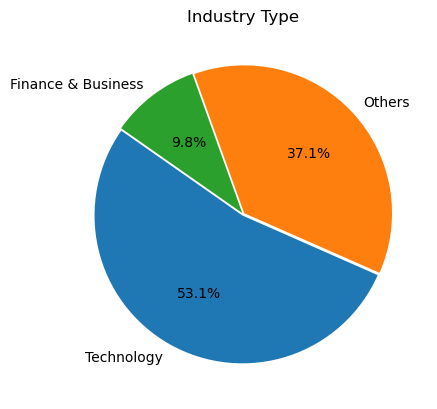

In [17]:
plt.pie(df['Industry Type'].value_counts(), labels = df['Industry Type'].value_counts().index, autopct = '%1.1f%%', explode = [0.01, 0.01, 0.01], startangle = 145)
plt.title("Industry Type")

Text(0.5, 1.0, 'Jobs with Employment Type')

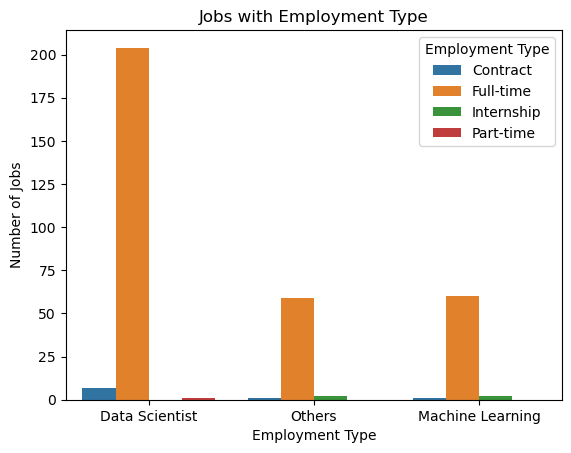

In [18]:
sn.countplot( x = 'Job_Title', hue = 'Employment Type', data = df)
plt.xlabel('Employment Type')
plt.ylabel('Number of Jobs')
plt.title('Jobs with Employment Type')

<Axes: xlabel='Job Function', ylabel='count'>

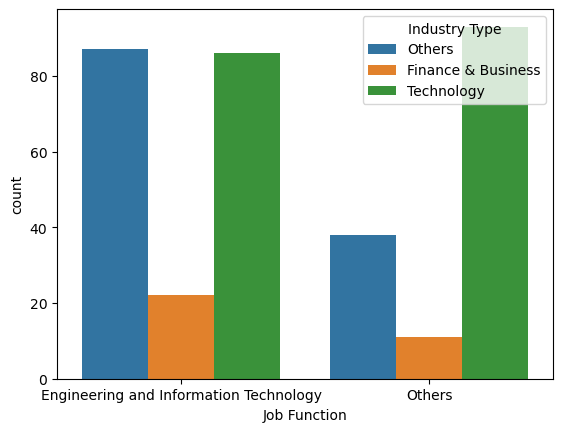

In [19]:
sn.countplot(x = 'Job Function', hue = 'Industry Type', data = df)